In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [8]:
# import qgrid for easy sorting
import qgrid

# set nax rows in pandas for easier viewing
pd.set_option('display.max_columns', 106)

In [35]:
# load the file
filename = '/Users/BrendanErhard/Desktop/Python/Projects/airbnb/listings.csv'
paris_df = pd.read_csv(filename)

# preview the data
paris_df.head()

/Users/BrendanErhard/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (43,61,62) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2577,https://www.airbnb.com/rooms/2577,20200510041557,2020-05-12,Loft for 4 by Canal Saint Martin,"100 m2 loft (1100 sq feet) with high ceiling, ...",The district has any service or shop you may d...,"100 m2 loft (1100 sq feet) with high ceiling, ...",none,NaN,NaN,"Metro lines : 4, 8, 3, 11, 9.",NaN,NaN,NaN,NaN,NaN,https://a0.muscache.com/im/pictures/09da057c-0...,NaN,2827,https://www.airbnb.com/users/show/2827,Karine,2008-09-09,"Casablanca, Grand Casablanca, Morocco","Arrivée à Casablanca il y a 4 ans, je suis amo...",within a day,100%,100%,f,https://a0.muscache.com/im/pictures/user/17fe6...,https://a0.muscache.com/im/pictures/user/17fe6...,République,2.0,2.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"Paris, Île-de-France, France",République,Entrepôt,NaN,Paris,Île-de-France,75010,Paris,"Paris, France",FR,France,48.86993,2.36251,t,Loft,Entire home/apt,4,2.0,2.0,2.0,Real Bed,"{TV,Internet,Wifi,Kitchen,Heating,Washer,Dryer...",NaN,$125.00,NaN,NaN,$0.00,$40.00,1,$0.00,3,1125,3,3,1125,1125,3.0,1125.0,18 months ago,t,30,60,90,365,2020-05-12,1,0,2019-01-02,2019-01-02,100.0,10.0,10.0,10.0,10.0,10.0,10.0,t,NaN,"{""translation missing: en.occupancy.taxes.juri...",t,f,strict_14_with_grace_period,f,f,1,1,0,0,0.06
1,3109,https://www.airbnb.com/rooms/3109,20200510041557,2020-05-13,zen and calm,Appartement très calme de 50M2 Utilisation de ...,I bedroom appartment in Paris 14,I bedroom appartment in Paris 14 Good restaura...,none,Good restaurants very close the Montparnasse S...,NaN,RER B Metro Ligne 13 Pernety Metro Ligne 13 Pl...,"A la demande, vous pouvez avoir accès à la cha...",yes I can help you out,NaN,NaN,NaN,https://a0.muscache.com/im/pictures/baeae9e2-c...,NaN,3631,https://www.airbnb.com/users/show/3631,Anne,2008-10-14,"Paris, Île-de-France, France",NaN,within a day,100%,50%,f,https://a0.muscache.com/im/users/3631/profile_...,https://a0.muscache.com/im/users/3631/profile_...,Alésia,1.0,1.0,"['email', 'phone', 'facebook', 'reviews']",t,f,"Paris, Île-de-France, France",Alésia,Observatoire,NaN,Paris,Île-de-France,75014,Paris,"Paris, France",FR,France,48.83349,2.31852,f,Apartment,Entire home/apt,2,1.0,0.0,1.0,Real Bed,"{Internet,Wifi,Kitchen,""Paid parking off premi...",NaN,$60.00,$490.00,NaN,$150.00,$60.00,1,$0.00,

In [10]:
# print out the columns
paris_df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       ...
       'instant_bookable', 'is_business_travel_ready', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month'],
      dtype='object', length=106)

In [5]:
# print out shape
paris_df.shape

(66900, 106)

In [36]:
# subset for the columns below
# id, listing_url, name, host_neighbourhood, neighbourhoud, latitude, longitude, property_type, abthrooms, bedrooms, beds, price
paris_df = paris_df[['id', 'listing_url', 'name', 'host_neighbourhood', 'neighbourhood',
                    'latitude', 'longitude', 'property_type', 'bathrooms', 'bedrooms', 'beds', 'price']]
paris_df.head()

,id,listing_url,name,host_neighbourhood,neighbourhood,latitude,longitude,property_type,bathrooms,bedrooms,beds,price
0,2577,https://www.airbnb.com/rooms/2577,Loft for 4 by Canal Saint Martin,République,République,48.86993,2.36251,Loft,2.0,2.0,2.0,$125.00
1,3109,https://www.airbnb.com/rooms/3109,zen and calm,Alésia,Alésia,48.83349,2.31852,Apartment,1.0,0.0,1.0,$60.00
2,5396,https://www.airbnb.com/rooms/5396,Explore the heart of old Paris,Saint-Paul - Ile Saint-Louis,IV Arrondissement,48.85100,2.35869,Apartment,1.0,0.0,1.0,$115.00
3,7397,https://www.airbnb.com/rooms/7397,MARAIS - 2ROOMS APT - 2/4 PEOPLE,Le Marais,IV Arrondissement,48.85758,2.35275,Apartment,1.0,2.0,2.0,$119.00
4,7964,https://www.airbnb.com/rooms/7964,Large & sunny flat with balcony !,Gare du Nord - Gare de I'Est,IX Arrondissement,48.87417,2.34245,Apartment,1.0,1.0,1.0,$130.00


In [12]:
# calculate the # of nulls values
paris_df.isnull().sum()

id                        0
listing_url               0
name                     66
host_neighbourhood    11091
neighbourhood            46
latitude                  0
longitude                 0
property_type             0
bathrooms                56
bedrooms                166
beds                    521
price                     0
dtype: int64

In [13]:
# use value_counts on the neighbourhood columns
paris_df['neighbourhood'].value_counts()

XVIII Arrondissement                 3837
XI Arrondissement                    3315
XV Arrondissement                    2773
X Arrondissement                     2615
XVII Arrondissement                  2504
République                           2355
XX Arrondissement                    2159
Montmartre                           2120
Buttes-Chaumont - Belleville         1909
XIX Arrondissement                   1819
XVI Arrondissement                   1812
IX Arrondissement                    1704
III Arrondissement                   1639
XII Arrondissement                   1608
Père Lachaise - Ménilmontant         1525
Bastille                             1518
Le Marais                            1414
II Arrondissement                    1339
Nation                               1259
Alésia                               1243
Batignolles                          1232
Opéra - Grands Boulevards            1212
XIV Arrondissement                   1115
Châtelet - Les Halles - Beaubourg 

In [14]:
# use value counts, normalize = True
paris_df['neighbourhood'].value_counts(normalize=True)

XVIII Arrondissement                 0.057394
XI Arrondissement                    0.049586
XV Arrondissement                    0.041478
X Arrondissement                     0.039115
XVII Arrondissement                  0.037455
République                           0.035226
XX Arrondissement                    0.032294
Montmartre                           0.031711
Buttes-Chaumont - Belleville         0.028555
XIX Arrondissement                   0.027209
XVI Arrondissement                   0.027104
IX Arrondissement                    0.025488
III Arrondissement                   0.024516
XII Arrondissement                   0.024052
Père Lachaise - Ménilmontant         0.022811
Bastille                             0.022706
Le Marais                            0.021151
II Arrondissement                    0.020029
Nation                               0.018832
Alésia                               0.018593
Batignolles                          0.018428
Opéra - Grands Boulevards         

In [37]:
# groupby the neighbourhood column and find the avg price per night

paris_df.dtypes

id                      int64
listing_url            object
name                   object
host_neighbourhood     object
neighbourhood          object
latitude              float64
longitude             float64
property_type          object
bathrooms             float64
bedrooms              float64
beds                  float64
price                  object
dtype: object

In [44]:
# replace the $$ using replace and regex
paris_df['price'].replace(regex=True, inplace=True, to_replace=r'[^0-9.\-]', value=r'')
paris_df['price'] = paris_df['price'].astype(float)

In [48]:
# now groupby neighbourhood and find the mean price
# then sort by 
paris_df_group = paris_df.groupby('neighbourhood', as_index=False)['price'].mean()
paris_df_group.sort_values(by=('price'),ascending=False).head()

,neighbourhood,price
8,Champs-Elysées,403.591118
50,VIII Arrondissement,251.496018
23,Madeleine - Vendôme,234.635294
22,Louvre - Tuileries,217.691489
32,Passy,215.449239


In [55]:
# now group by neighbourhood, find the avg price and count by nighbourhood
# then sort by highest avg price
paris_df_group_avg = paris_df[['neighbourhood', 'price']].groupby('neighbourhood').agg(['mean', 'count'])
paris_df_group_avg.sort_values([('price','mean')], ascending=False).head()


price      
                           mean count
neighbourhood                        
Champs-Elysées       403.591118   653
VIII Arrondissement  251.496018   879
Madeleine - Vendôme  234.635294   170
Louvre - Tuileries   217.691489    94
Passy                215.449239   788

In [69]:
# facetgrid
# need to groupby nighbourhood and price
# we already have this

paris_df_group_raw = paris_df[['neighbourhood', 'price']]
paris_df_group_raw.tail()

,neighbourhood,price
66895,XVI Arrondissement,60.0
66896,X Arrondissement,40.0
66897,X Arrondissement,32.0
66898,Bastille,65.0
66899,République,30.0


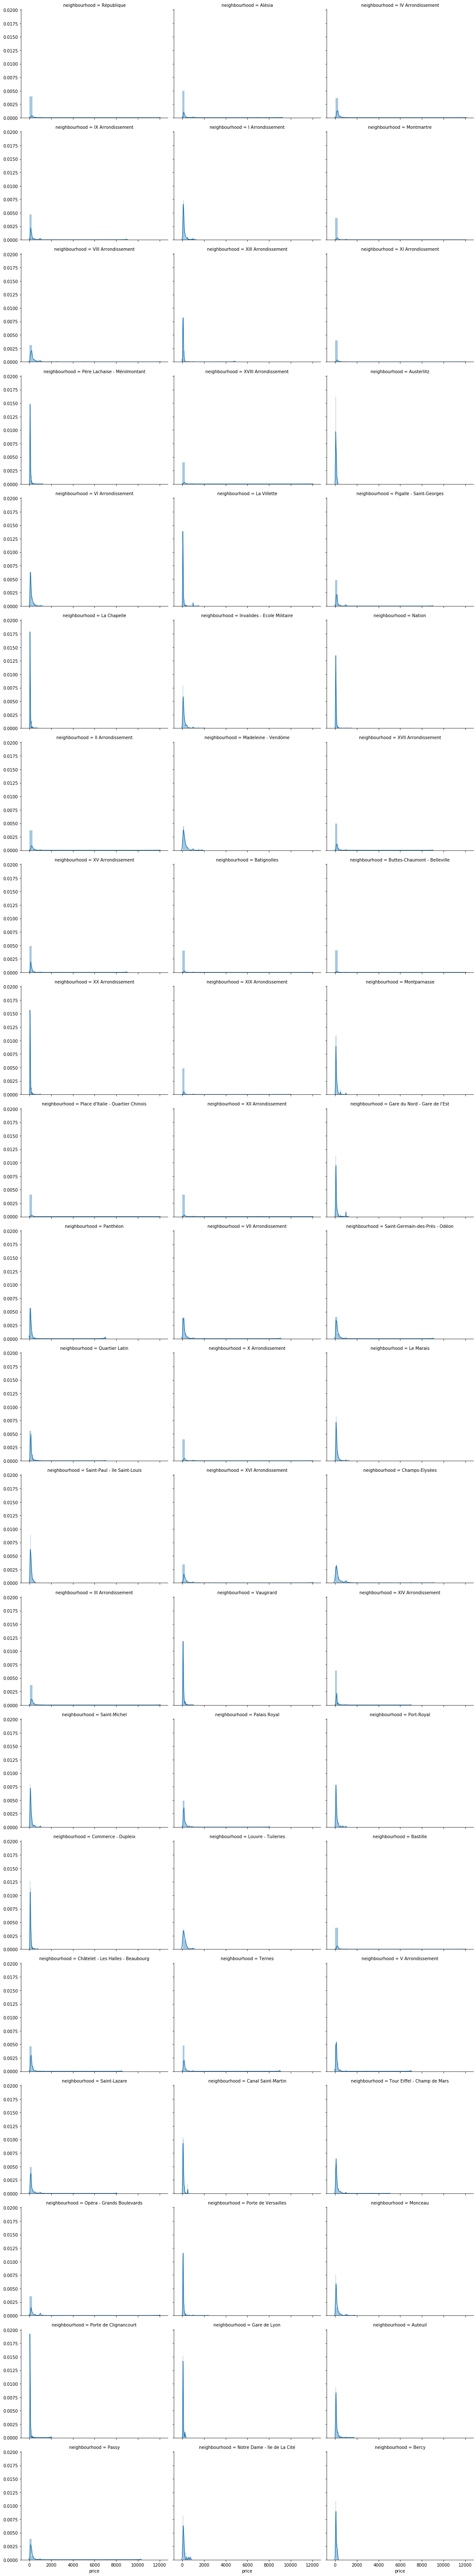

In [85]:
import seaborn as sns
g = sns.FacetGrid(paris_df_group_raw, col = 'neighbourhood', col_wrap = 3,height=4, sharey=True,aspect=1.3)
g.map(sns.distplot, 'price')